In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%pylab inline
#seaborn settings
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (10,6)})

Populating the interactive namespace from numpy and matplotlib


In [2]:
% matplotlib inline
plt.style.use('ggplot')

# Data Preparation

These initial steps access the data, explore it, isolate important columns, and clean it. 

In [3]:
xl = pd.ExcelFile('Copy of WI_Manufacturers316.xlsx')
xl.sheet_names

[u'Sheet1', u'Sheet2', u'Sheet3']

df1 = xl.parse("Sheet1")
df1.head()

,Contact Prefix,Contact First Name,Contact Middle Name,Contact Last Name,Contact Suffix,Contact Title,Age,Salary (US Dollars),Bonus (US Dollars),Company Name,...,Bonus (US Dollars)12,Contact Prefix13,Contact First Name13,Contact Middle Name13,Contact Last Name13,Contact Suffix13,Contact Title13,Age13,Salary (US Dollars)13,Bonus (US Dollars)13
0,Mr,Bruce,NaN,Roberts,NaN,Manager,NaN,NaN,YES,Clement Welding & Fabricating Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mr,Jere,NaN,Benedict,NaN,Pres-treas,NaN,NaN,YES,Bencher Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,Pride Abrasive Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mr,Chris,NaN,Clough,NaN,Operations Manager,NaN,NaN,YES,Puratos Corporation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ms,Ida,NaN,Tenuta,NaN,V Pres,NaN,NaN,YES,A T Polishing Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(df1)

20065

Initial examination shows several possible important columns: Line Of Business, Owns Rents, Facility Size, Is Importer, Is Exporter, Doing Business As, Company Type, Is Subsidiary, Is Manufacturing, Language Preference, Is Women Owned, Is Minority Owned, Fiscal Year-End, Revenue (US Dollars, million), Revenue Growth (%), Net Income (US Dollars, million), Income Growth (%), Total Employees, Employee Growth (%), Total Assets (US Dollars, million), Market Value (US Dollars, million), Primary Industry 

In [5]:
df = df1[['Company Name','Line Of Business','Owns Rents','Facility Size (sq Ft)', 'Is Importer', 'Is Exporter', 'Is Manufacturing', 'Is Women Owned', 'Is Minority Owned', 'Revenue (US Dollars, million)', 'Net Income (US Dollars, million)', 'Total Employees', 'Total Assets (US Dollars, million)', 'Primary Industry' ]]

In [6]:
df.head()

,Company Name,Line Of Business,Owns Rents,Facility Size (sq Ft),Is Importer,Is Exporter,Is Manufacturing,Is Women Owned,Is Minority Owned,"Revenue (US Dollars, million)","Net Income (US Dollars, million)",Total Employees,"Total Assets (US Dollars, million)",Primary Industry
0,Clement Welding & Fabricating Inc,"Fabricated metal products, nec, nsk",Owns,10000.0,No,No,Yes,No,No,1.400000,0.0,15.0,0.0,Fabricated Metal Product Manufacturing
1,Bencher Inc,Photographic equipment and supplies,Rents,11000.0,No,No,Yes,No,No,1.400000,0.0,12.0,0.0,Photographic & Optical Equipment/Supplies Manu...
2,Pride Abrasive Inc,"Abrasive products, nsk",Rents,11500.0,Yes,No,Yes,Yes,No,1.400000,0.0,17.0,0.0,Abrasives Manufacturing
3,Puratos Corporation,"Food preparations, nec, nsk",NaN,11178.0,No,No,Yes,No,No,1.334543,0.0,NaN,0.0,Food Manufacturing
4,A T Polishing Inc,Plating and polishing,Owns,8335.0,No,No,Yes,No,No,1.500000,0.0,20.0,0.0,Fabricated Metal Product Manufacturing


In [7]:
df.shape

(20065, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20065 entries, 0 to 20064
Data columns (total 14 columns):
Company Name                          20065 non-null object
Line Of Business                      20017 non-null object
Owns Rents                            7936 non-null object
Facility Size (sq Ft)                 19607 non-null float64
Is Importer                           20065 non-null object
Is Exporter                           20065 non-null object
Is Manufacturing                      20065 non-null object
Is Women Owned                        20065 non-null object
Is Minority Owned                     20065 non-null object
Revenue (US Dollars, million)         17218 non-null float64
Net Income (US Dollars, million)      17218 non-null float64
Total Employees                       17249 non-null float64
Total Assets (US Dollars, million)    17218 non-null float64
Primary Industry                      20065 non-null object
dtypes: float64(5), object(9)
memory usage: 2.1

In [9]:
df['Is Exporter'].value_counts(dropna = False)

No     18853
Yes     1212
Name: Is Exporter, dtype: int64

Some notes: I have kept 'Owns Rents' as I feel it may prove usefule, but it should be noted only about 40% have entries.

It appears that there are companies listed more than once. For now, I will not consolidate them but treat them as separate entities.
Facility Size, Revenue, etc have some NaN's, so be prepared for those.
Net Income has 16924 0's. Total assets likewise has 17177 0's. So these columns have zero's inaddition to NaN's that should be accounted for.

In [10]:
df.describe()

,Facility Size (sq Ft),"Revenue (US Dollars, million)","Net Income (US Dollars, million)",Total Employees,"Total Assets (US Dollars, million)"
count,1.960700e+04,17218.000000,17218.000000,17249.000000,17218.000000
mean,1.935271e+04,17.614536,0.253996,75.136704,6.028600
std,6.479473e+04,337.095765,18.218770,1266.019418,266.924297
min,0.000000e+00,0.000005,-1178.004000,1.000000,0.000000
25%,2.518000e+03,0.110000,0.000000,2.000000,0.000000
50%,4.204000e+03,0.302094,0.000000,4.000000,0.000000
75%,1.386000e+04,1.700000,0.000000,15.000000,0.000000
max,3.300000e+06,37179.000000,1563.000000,139000.000000,29673.000000


Note that there are outliers in Facility Size, Revenue and Total Employees. Most of these companies are smaller but there are a couple of large ones. Futher, the majority of Net Income and Total Assets are 0 or less. This could mean they are not making a profit, or it could be a sign of missing data.

In [11]:
df[df['Facility Size (sq Ft)'] > 1500000]

,Company Name,Line Of Business,Owns Rents,Facility Size (sq Ft),Is Importer,Is Exporter,Is Manufacturing,Is Women Owned,Is Minority Owned,"Revenue (US Dollars, million)","Net Income (US Dollars, million)",Total Employees,"Total Assets (US Dollars, million)",Primary Industry
30,Snap-on Incorporated,"Power-driven handtools, nsk",Owns,3300000.0,Yes,No,Yes,No,No,3593.100000,478.700,11500.0,4486.900,"Handtool, Cutlery, & Flatware Manufacturing"
550,ATI LADISH LLC,"Iron and steel forgings, nsk",Owns,1650000.0,Yes,Yes,Yes,No,No,403.132000,25.375,1637.0,485.568,Transportation Equipment Manufacturing
4971,Quad/Graphics Inc.,"Commercial printing, lithographic",Owns,1970000.0,Yes,Yes,Yes,No,No,4862.400000,18.600,24100.0,4077.200,Commercial Printing
10760,Heinz Kraft Foods Company,Sausages and other prepared meats,Owns,1995826.0,No,No,Yes,No,No,NaN,NaN,NaN,NaN,Meat Product Manufacturing
13157,The Trane Company,"Refrigeration and heating equipment, nsk",Rents,2000000.0,Yes,Yes,Yes,No,No,613.516388,0.000,2620.0,0.000,HVAC Equipment Manufacturing
18338,"ASHLEY FURNITURE INDUSTRIES, INC.","Wood household furniture, nsk",Owns,2000000.0,Yes,Yes,Yes,No,No,5088.807004,0.000,16300.0,0.000,Furniture Manufacturing


In [12]:
df[df['Revenue (US Dollars, million)'] > 5000]

,Company Name,Line Of Business,Owns Rents,Facility Size (sq Ft),Is Importer,Is Exporter,Is Manufacturing,Is Women Owned,Is Minority Owned,"Revenue (US Dollars, million)","Net Income (US Dollars, million)",Total Employees,"Total Assets (US Dollars, million)",Primary Industry
592,"JOHNSON CONTROLS, INC.","Public building and related furniture, ns",NaN,34564.0,Yes,Yes,Yes,No,No,37179.000000,1563.000,139000.0,29673.000,Automobile Parts Manufacturing
593,"Rockwell Automation, Inc.","Relays and industrial controls, nsk",Owns,15782.0,Yes,No,Yes,No,No,6307.900000,827.600,22500.0,6404.700,Industrial Control Products Manufacturing
594,"HARLEY-DAVIDSON, INC.","Motorcycles, bicycles, and parts, nsk",Owns,515000.0,Yes,Yes,Yes,No,No,5995.402000,752.207,6300.0,9991.167,Motorcycle Manufacturing
3190,"S. C. JOHNSON & SON, INC.",Polishes and sanitation goods,NaN,23103.0,Yes,Yes,Yes,No,No,9400.000000,0.000,12000.0,0.000,Soap & Other Detergent Manufacturing
11510,"MENARD, INC.","Millwork, nsk",Owns,1000000.0,Yes,Yes,Yes,No,No,7600.000000,0.000,40000.0,0.000,Home Centers & Hardware Stores
18338,"ASHLEY FURNITURE INDUSTRIES, INC.","Wood household furniture, nsk",Owns,2000000.0,Yes,Yes,Yes,No,No,5088.807004,0.000,16300.0,0.000,Furniture Manufacturing
18992,Oshkosh Corporation,Motor vehicles and car bodies,Owns,15944.0,No,No,Yes,No,No,6098.100000,229.500,13300.0,4613.000,Truck & Bus Manufacturing


In [13]:
df[df['Total Employees'] > 20000]

,Company Name,Line Of Business,Owns Rents,Facility Size (sq Ft),Is Importer,Is Exporter,Is Manufacturing,Is Women Owned,Is Minority Owned,"Revenue (US Dollars, million)","Net Income (US Dollars, million)",Total Employees,"Total Assets (US Dollars, million)",Primary Industry
592,"JOHNSON CONTROLS, INC.","Public building and related furniture, ns",NaN,34564.0,Yes,Yes,Yes,No,No,37179.0,1563.0,139000.0,29673.0,Automobile Parts Manufacturing
593,"Rockwell Automation, Inc.","Relays and industrial controls, nsk",Owns,15782.0,Yes,No,Yes,No,No,6307.9,827.6,22500.0,6404.7,Industrial Control Products Manufacturing
4971,Quad/Graphics Inc.,"Commercial printing, lithographic",Owns,1970000.0,Yes,Yes,Yes,No,No,4862.4,18.6,24100.0,4077.2,Commercial Printing
11510,"MENARD, INC.","Millwork, nsk",Owns,1000000.0,Yes,Yes,Yes,No,No,7600.0,0.0,40000.0,0.0,Home Centers & Hardware Stores
16641,Regal-Beloit Corporation,"Motors and generators, nsk",Owns,54000.0,Yes,Yes,Yes,No,No,3257.1,31.0,24100.0,3407.6,Motor & Generator Manufacturing
17519,Kohler Co.,"Metal sanitary ware, nsk",Owns,18488.0,Yes,Yes,Yes,No,No,4680.0,0.0,30000.0,0.0,China & Earthenware Plumbing Fixture Manufactu...


As you look at the high outliers, more of them become exporters, so these are probalby important to keep for the model.

In [14]:
# let's go ahdead and make those yes/no columns into categories
df['Is Exporter'] = df['Is Exporter'].astype('category')
df['Is Women Owned'] = df['Is Women Owned'].astype('category')
df['Is Minority Owned'] = df['Is Minority Owned'].astype('category')
df['Owns Rents'] = df['Owns Rents'].astype('category')
df['Is Importer'] = df['Is Importer'].astype('category')
df['Is Manufacturing'] = df['Is Manufacturing'].astype('category')

C:\Users\asduser\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\asduser\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\asduser\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

## Visualization and Cleaning
 
 As I look through the data some questions to consider:

    Can you count something interesting?

    Can you find some trends (high, low, increase, decrease, anomalies)?

    Can you make a bar plot or a histogram?

    Can you compare two related quantities?

    Can you make a scatterplot?


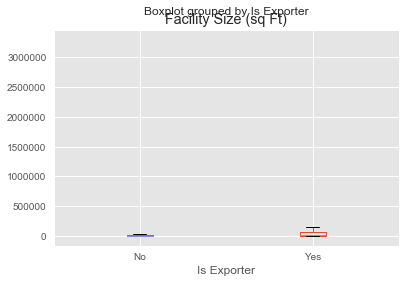

In [15]:
df.boxplot(column='Facility Size (sq Ft)', by='Is Exporter')

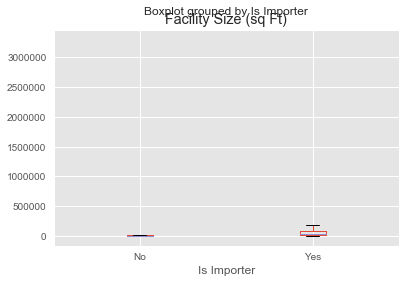

In [16]:
df.boxplot(column='Facility Size (sq Ft)', by='Is Importer')

Note the similar shape here in facility size and export vs import. This may be indicate that Importers may also tend to be Exporters.

In [17]:
df = df.drop(df.index[[10451,14465,14670,15838,19537]]) #These facility sizes were zero and were either mostly void of useful data or apperaed to be wrong

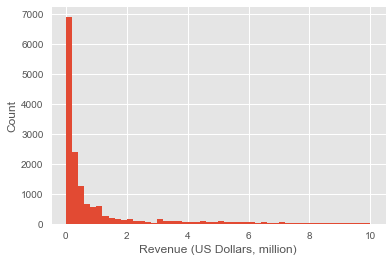

In [18]:
plt.hist(df['Revenue (US Dollars, million)'].dropna(),bins=50, range = [0, 10])
plt.xlabel('Revenue (US Dollars, million)')
plt.ylabel('Count')
plt.show()

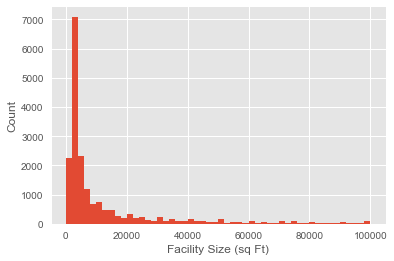

In [19]:
plt.hist(df['Facility Size (sq Ft)'].dropna(),bins=50, range = [0,100000])
plt.xlabel('Facility Size (sq Ft)')
plt.ylabel('Count')
plt.show()

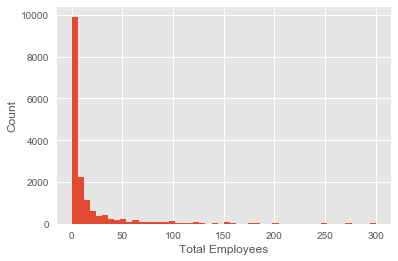

In [20]:
plt.hist(df['Total Employees'].dropna(),bins=50, range = [0,300])
plt.xlabel('Total Employees')
plt.ylabel('Count')
plt.show()

Again you can visually see that the majority of companies are "small" in all these categories. However, this 'L' shape also indicates that a transform may be helpful. I will try a log transform and see if that creates a more Gausian distribution.

C:\Users\asduser\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\asduser\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


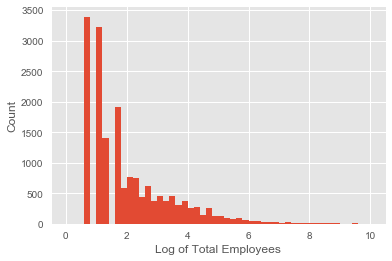

In [21]:
E = df['Total Employees']
E = E + 1
E = log(E)
plt.hist(E,bins=50, range = [0,10])
plt.xlabel('Log of Total Employees')
plt.ylabel('Count')
plt.show()

C:\Users\asduser\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\asduser\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


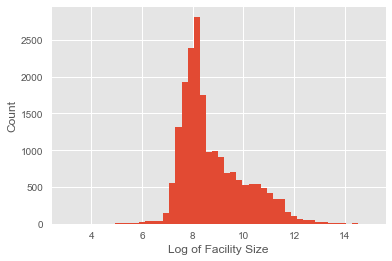

In [22]:
F = df['Facility Size (sq Ft)']
F = log(F)
plt.hist(F,bins=50, range = [3,15])
plt.xlabel('Log of Facility Size')
plt.ylabel('Count')
plt.show()

C:\Users\asduser\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\asduser\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


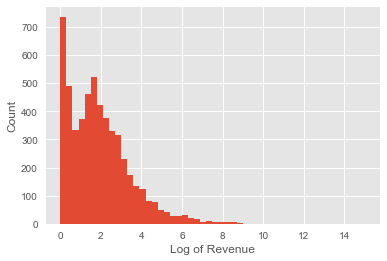

In [23]:
R = df['Revenue (US Dollars, million)']
R = log(R)
plt.hist(R,bins=50, range = [0,15])
plt.xlabel('Log of Revenue')
plt.ylabel('Count')
plt.show()

These transormations significantly improved Revenue and Facility Size in their distributions, with a slight improvement in Employee Size. Still, it is hard to get around the fact that these are mostly small companies.

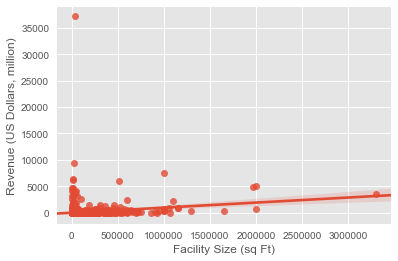

In [24]:
sns.regplot(y=df['Revenue (US Dollars, million)'], x=df['Facility Size (sq Ft)'], fit_reg = True)

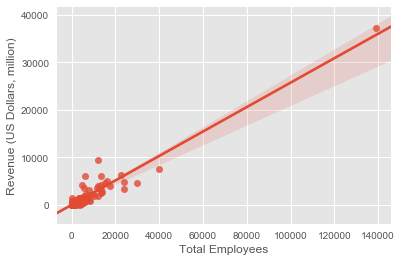

In [25]:
sns.regplot(y=df['Revenue (US Dollars, million)'], x=df['Total Employees'], fit_reg = True)

In [26]:
mask = ~np.isnan(df['Total Employees']) & ~np.isnan(df['Revenue (US Dollars, million)'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Total Employees'][mask], df['Revenue (US Dollars, million)'][mask])

In [27]:
print('Revenue = ' + str(slope) + '*Employees + ' + str(intercept))

Revenue = 0.257081744012*Employees + -1.14749808441


Note that Total Employees vs Revenue is fairly linear, but Revenue vs Facility Size is not. Likewise, facility size versus employees was not very linear (again, an 'L' shape to the scatter). So let's try the log versions.

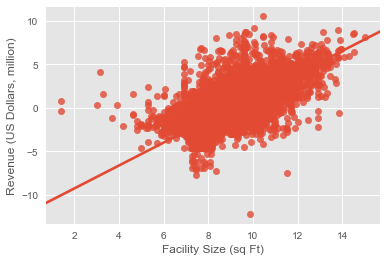

In [28]:
sns.regplot(y=R, x=F, fit_reg = True)

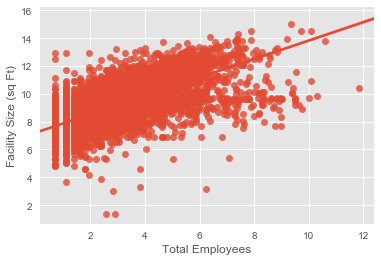

In [29]:
sns.regplot(y=F, x=E, fit_reg = True)

This greatly shifts the clulsters and provides a more obvious trend.

## Comparing by export and productivity

In [30]:
df = df.drop(['Line Of Business','Company Name', 'Primary Industry'],axis = 1)
df_binary = pd.get_dummies(df)

In [31]:
df_binary = df_binary.drop(['Owns Rents_Rents',  'Is Importer_No', 'Is Exporter_No','Is Manufacturing_No', 'Is Women Owned_No','Is Minority Owned_No'],axis = 1)
df_binary.head()

,Facility Size (sq Ft),"Revenue (US Dollars, million)","Net Income (US Dollars, million)",Total Employees,"Total Assets (US Dollars, million)",Owns Rents_Owns,Is Importer_Yes,Is Exporter_Yes,Is Manufacturing_Yes,Is Women Owned_Yes,Is Minority Owned_Yes
0,10000.0,1.400000,0.0,15.0,0.0,1,0,0,1,0,0
1,11000.0,1.400000,0.0,12.0,0.0,0,0,0,1,0,0
2,11500.0,1.400000,0.0,17.0,0.0,0,1,0,1,1,0
3,11178.0,1.334543,0.0,NaN,0.0,0,0,0,1,0,0
4,8335.0,1.500000,0.0,20.0,0.0,1,0,0,1,0,0


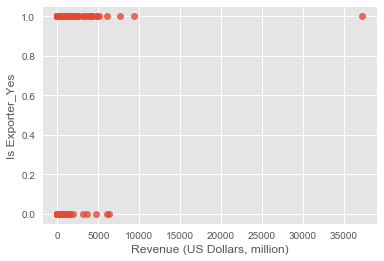

In [32]:
sns.regplot(y=df_binary['Is Exporter_Yes'], x=df_binary['Revenue (US Dollars, million)'], fit_reg = False)

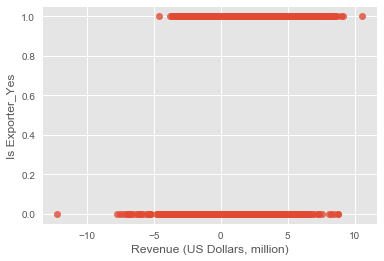

In [33]:
sns.regplot(y=df_binary['Is Exporter_Yes'], x=R, fit_reg = False) #log version

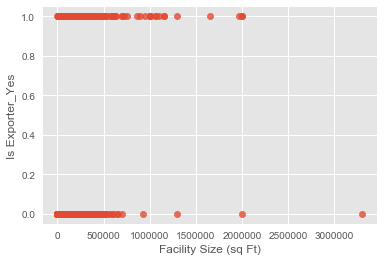

In [34]:
sns.regplot(y=df_binary['Is Exporter_Yes'], x=df_binary['Facility Size (sq Ft)'], fit_reg = False)

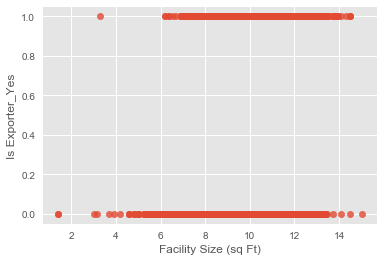

In [35]:
sns.regplot(y=df_binary['Is Exporter_Yes'], x=F, fit_reg = False) #log version

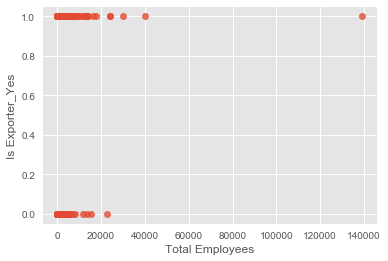

In [36]:
sns.regplot(y=df_binary['Is Exporter_Yes'], x=df_binary['Total Employees'], fit_reg = False)

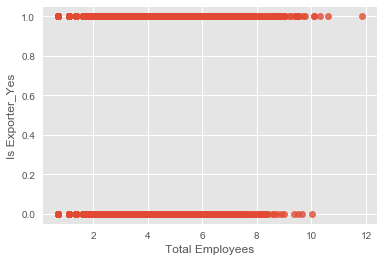

In [37]:
sns.regplot(y=df_binary['Is Exporter_Yes'], x=E, fit_reg = False) #log version

Looking at this there does appear to be a shift to the right (higher value) in these three categories for exporters over non-exporters except for in the log version of Employees. Now let's look at some measures of productivity.

In [38]:
#Creating the comparisson values: Revenue per sqFt, Revenue per employee, and SqFt per Employee
RevPerEm = df_binary['Revenue (US Dollars, million)']/df_binary['Total Employees']
RevPerSq =df_binary['Revenue (US Dollars, million)']/df_binary['Facility Size (sq Ft)']
SqPerEm = df_binary['Facility Size (sq Ft)']/df_binary['Total Employees']

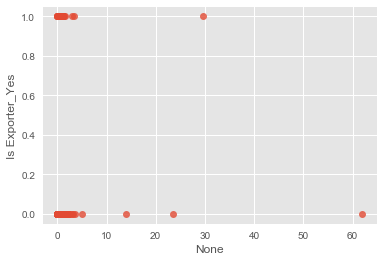

In [39]:
sns.regplot(y=df_binary['Is Exporter_Yes'], x=RevPerEm, fit_reg = False)

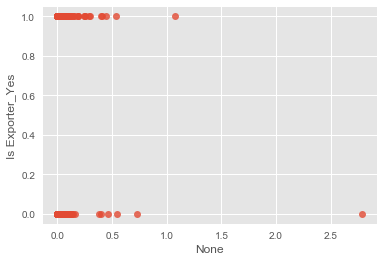

In [40]:
sns.regplot(y=df_binary['Is Exporter_Yes'], x=RevPerSq, fit_reg = False)

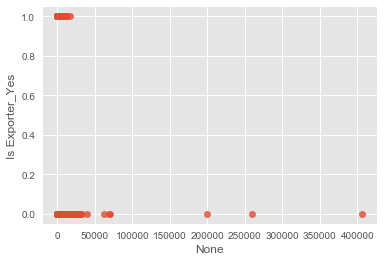

In [41]:
sns.regplot(y=df_binary['Is Exporter_Yes'], x=SqPerEm, fit_reg = False)

There is not dramatic visual shift here, but we will explore the statistics in the next notebook.

In [42]:
LogRpE = R/E
LogRpF = R/F
LogFpE = F/E

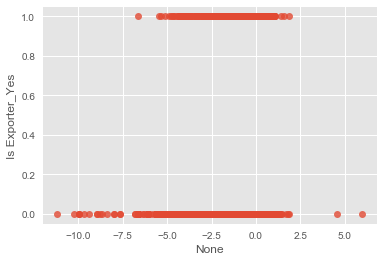

In [43]:
sns.regplot(y=df_binary['Is Exporter_Yes'], x=LogRpE, fit_reg = False)

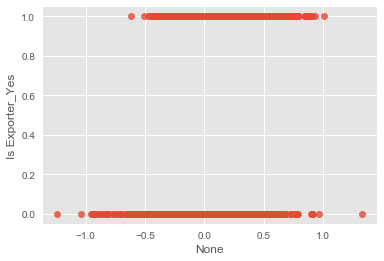

In [44]:
sns.regplot(y=df_binary['Is Exporter_Yes'], x=LogRpF, fit_reg = False)

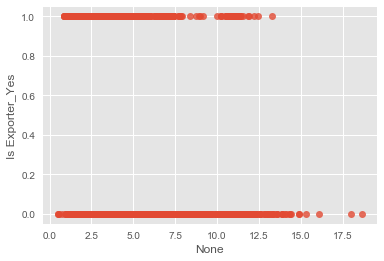

In [45]:
sns.regplot(y=df_binary['Is Exporter_Yes'], x=LogFpE, fit_reg = False)

There is more of a shift when using the log versions of the variables, although not with Facility compared to Employees. This indicates that using the log version of the variables may be better for the features in our model.

# Conclusion

The companies in this data set are primarily on the smaller side with a dramatic skew toward the small revenue and employee size, etc.

Looking at all these visulaizations, it seems that the most dramatic relationships are between revenue and employees and revenue and facility size. These show up as correlation in the scatterplots and in shifts in the scatter plots.

The next step will be to compare the means and other inferential statistics for some of these features.

In [46]:
df_cleaned = pd.concat([df_binary,RevPerEm, RevPerSq, SqPerEm, LogRpE, LogRpF, LogFpE], axis = 1)

In [47]:
df_cleaned.head()

,Facility Size (sq Ft),"Revenue (US Dollars, million)","Net Income (US Dollars, million)",Total Employees,"Total Assets (US Dollars, million)",Owns Rents_Owns,Is Importer_Yes,Is Exporter_Yes,Is Manufacturing_Yes,Is Women Owned_Yes,Is Minority Owned_Yes,0,1,2,3,4,5
0,10000.0,1.400000,0.0,15.0,0.0,1,0,0,1,0,0,0.093333,0.000140,666.666667,0.121357,0.036532,3.321928
1,11000.0,1.400000,0.0,12.0,0.0,0,0,0,1,0,0,0.116667,0.000127,916.666667,0.131181,0.036158,3.628006
2,11500.0,1.400000,0.0,17.0,0.0,0,1,0,1,1,0,0.082353,0.000122,676.470588,0.116411,0.035986,3.234913
3,11178.0,1.334543,0.0,NaN,0.0,0,0,0,1,0,0,NaN,0.000119,NaN,NaN,0.030959,NaN
4,8335.0,1.500000,0.0,20.0,0.0,1,0,0,1,0,0,0.075000,0.000180,416.750000,0.133179,0.044911,2.965397


In [49]:
#df_cleaned.to_csv('cleaned set new.csv') #Commented out now as this has been done and don't want to do it again if the notebook is rerun.